<a href="https://colab.research.google.com/github/thedataninja1786/Machine-Learning/blob/main/Chest_X_ray_(Covid_19_%26_Pneumonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.metrics import confusion_matrix 
import itertools 
import os 
import shutil 
import random 
import glob 
import matplotlib.pyplot as plt 
import warnings 
import cv2 
warnings.simplefilter(action = 'ignore', category = FutureWarning)


/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/test/NORMAL/NORMAL(1278).jpg


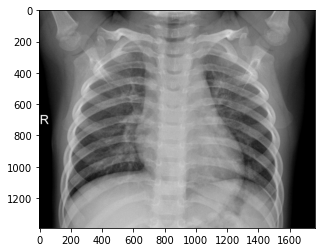

/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/test/COVID19/COVID19(464).jpg


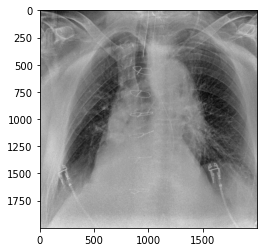

/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/test/PNEUMONIA/PNEUMONIA(3427).jpg


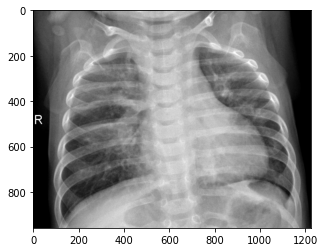

/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19/COVID19(12).jpg


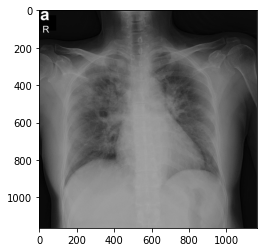

/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL/NORMAL(1250).jpg


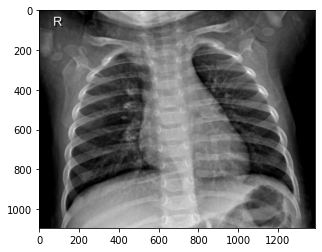

/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/train/PNEUMONIA/PNEUMONIA(3143).jpg


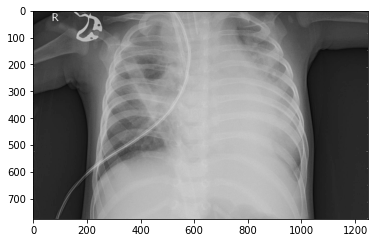

In [2]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        array = cv2.imread(os.path.join(dirname, filename),cv2.IMREAD_GRAYSCALE)
        plt.imshow(array,cmap = "gray")
        plt.show()
        break 

In [4]:
train_path = '/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/train'
test_path = '/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/Data/test'

In [5]:
#Preprocess the input images with vgg16 model 
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = train_path, target_size = (224,224), classes = ['NORMAL','COVID19','PNEUMONIA']\
                     , batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = test_path, target_size = (224,224),classes = ['NORMAL','COVID19','PNEUMONIA']\
                     , batch_size = 10, shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

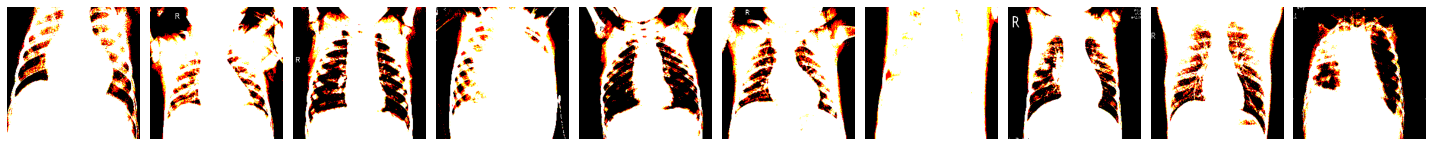

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [21]:
#plot the training images after the processing
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
    
  for img, ax in zip(images_arr,axes):
    ax.imshow(img, cmap = 'gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation= 'relu', padding = 'same', input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2),strides = 2),
                    Conv2D(filters=64, kernel_size=(3,3),activation= 'relu', padding = 'same'),
                    MaxPool2D(pool_size=(2,2),strides = 2),
                    Flatten(),
                    Dense(units=3,activation='softmax'),          
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

model.fit(x=train_batches,epochs = 50, verbose = 2)#, callbacks=[tensorboard_callback])

In [20]:
model.save('/content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Chest X-ray (Covid-19 & Pneumonia)/assets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

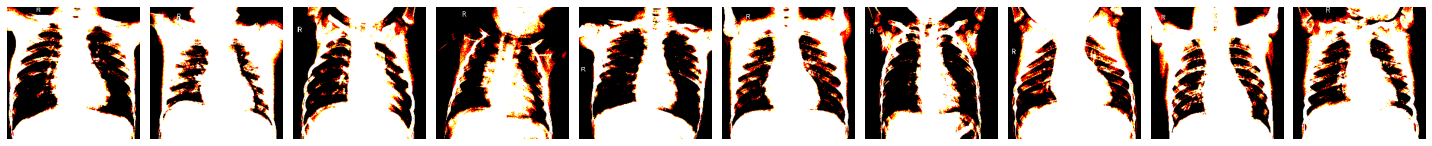

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
#plot the test images
test_imgs,test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
predictions = model.predict(x = test_batches, verbose = 1)

129/129 [==============================] - 461s 4s/step


In [15]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis = -1))

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title= 'Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,cm[i,j]),
      horizontalalignment = 'center',
      color = 'white' if cm[i,j] > thresh else 'black'

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[290   1  26]
 [  4 105   7]
 [ 40   3 812]]


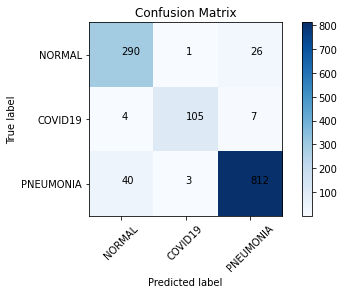

In [18]:
cm_plot_labels = ['NORMAL','COVID19','PNEUMONIA']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title = 'Confusion Matrix')